In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Numerical Solution of Yoyo despinning

$\ddot{r} = r \dot{\theta}^2$

$\ddot{r} = r\left(\frac{2mr_0^2+MR^2/2}{2mr^2+MR^2/2}\right)^2 \dot{\theta}(0)$

Here we plot the relation between angular velocity and distance from center of cylinder just based upon conservation of angular momentum:

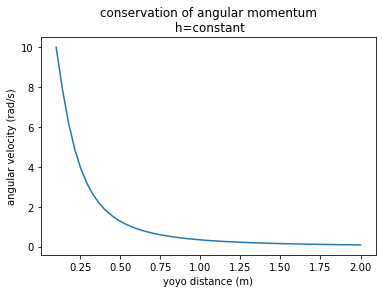

In [2]:
m=0.1 #kg
M=1 #kg
R=0.1 #meter
w0=10 # rad/s
r=np.linspace(0.1,2)
h0=(2*m*r[0]**2+M*r[0]**2/2)*w0

wt = h0/(2*m*r**2+M*R**2/2)

plt.plot(r,wt)
plt.xlabel('yoyo distance (m)')
plt.ylabel('angular velocity (rad/s)')
plt.title('conservation of angular momentum\n h=constant');

# Define the state and d/dt(state)

In this part, we define the second order differential equation as a state-space form

the state = $[r,~\dot{r}]$

and the derivative of the state is

d/dt(state) = $[\dot{r},~\ddot{r}]=[\dot{r},~\frac{F_r}{m}]$

We call the function, `yoyo_ode(y,t)`, where `y` is the state and `t` is the current time.

In [3]:
def yoyo_ode(y,t):
    '''define d2r/dt2= r*(h0/2m)^2/(M*R^2/4m+r^2)^2'''
    dr=np.zeros(np.shape(y))
    dr[0]=y[1]
    dr[1]=y[0]*h0**2/(2*m*y[0]**2+M*R**2/2)**2
    return dr

In [4]:
yoyo_ode([0.15,1],0)

array([1.        , 8.14404432])

The function `odeint` integrates our `yoyo_ode` based upon the initial condtions, 

$[r(0),~\dot{r}(0)] = [0.1~m,~0~m/s]$

and the time span of interest, 

$t = [0-0.5~s]$

in the line, `t=np.linspace(0,0.5)`

Text(0, 0.5, 'yoyo pos (m)')

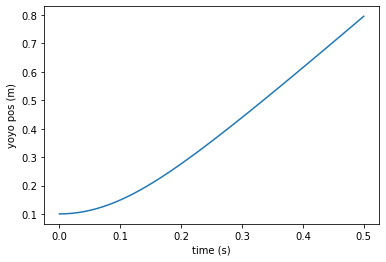

In [5]:
t=np.linspace(0,0.5)
r=odeint(yoyo_ode,[0.1,0],t)

plt.plot(t,r[:,0])
plt.xlabel('time (s)')
plt.ylabel('yoyo pos (m)')

# To save to file from python output

Have to join the time, $r$, and $\dot{r}$ into an array then save to a file:

In [6]:
np.savetxt('t_r_rdot.csv',np.array([t,r[:,0],r[:,1]]).T,delimiter=',')

This line of code organizes a comma-separated-value file into the file t_r_rdot.csv with no headers.

|time (s)| r (m) | $\dot{r}$ (m/s)|
|---|---|---|
|0| 0.1| 0 |
|...|...|...|